## 3. 토픽 분석

### 3-1. 불용어 제거

In [24]:
options(scipen=999)

In [25]:
library(tm)
library(topicmodels)
library(ggplot2)
library(tidytext)
library(dplyr)

In [67]:
df = read.csv(file='C:/Users/hmins/Desktop/project_chart.csv', encoding='utf-8')

nrow(df)
ncol(df)

[1] 913

[1] 3510

In [68]:
df = df[ , !colnames(df)%in%c('것','게','명','중','개','안','배','법','도','전','일','심','세','등','옆',
                              '원','위','살','명','제','첫','주','세','값','쇼','장','도','전','년','물','타',
                              '전','또','첫','오른','승','권','전','등','건','책','호','해','왜','안','발','후',
                              '일','영','타','분','페스','석','환','국','돈','중','수','중','괌','여','불','당',
                              '친','등','행','전','내','등','급','날','달','왜','준','서도','오늘','설','차','준',
                              '딸','규','황보','승희','집','층','아이','향기','게이츠','만난','때','김은경','무',
                              '낮','땐','통','그','더','줄','앞','클린스만','페루','비','이','의','령','범','알',
                              '나','통해','그','팀','곳','임','재','주년','연내','선','말','속','새','클럽','꿈',
                              '진짜','데이','블','링컨')]

nrow(df)
ncol(df)

[1] 913

[1] 3403

In [69]:
a = apply(df,2,sum)
a = as.integer(a)

df[914,] <- a

main_df = df[,df[914,]>3]
main_df[909:914,]

,사고,병원,건설,노조,청년,도약,계좌,은행,대통령,국정원,...,대학,파업,저지,단지,금감원,의원,소송,전자,구속영장,포착
909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,7,6,9,10,12,8,8,5,9,7,...,5,5,4,4,4,6,4,4,4,4


In [70]:
nrow(main_df)
ncol(main_df)

[1] 914

[1] 351

In [71]:
b = apply(main_df,1,sum)
b = as.integer(b)

main_df[,352] <- b

main_df = main_df[main_df[,352]>0,]

In [72]:
nrow(main_df)
ncol(main_df)

[1] 808

[1] 352

In [73]:
main_df = main_df[1:807,]
main_df = main_df[,1:351]
main_df

,사고,병원,건설,노조,청년,도약,계좌,은행,대통령,국정원,...,대학,파업,저지,단지,금감원,의원,소송,전자,구속영장,포착
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
nrow(main_df)
ncol(main_df)

[1] 807

[1] 351

In [75]:
saveRDS(main_df,file='C:/Users/hmins/Desktop/data.rds')

In [76]:
df_rds = readRDS('C:/Users/hmins/Desktop/data.rds')

### 3-3. LDA

In [56]:
df2 = read.csv(file='C:/Users/hmins/Desktop/project_df.csv', encoding='utf-8')

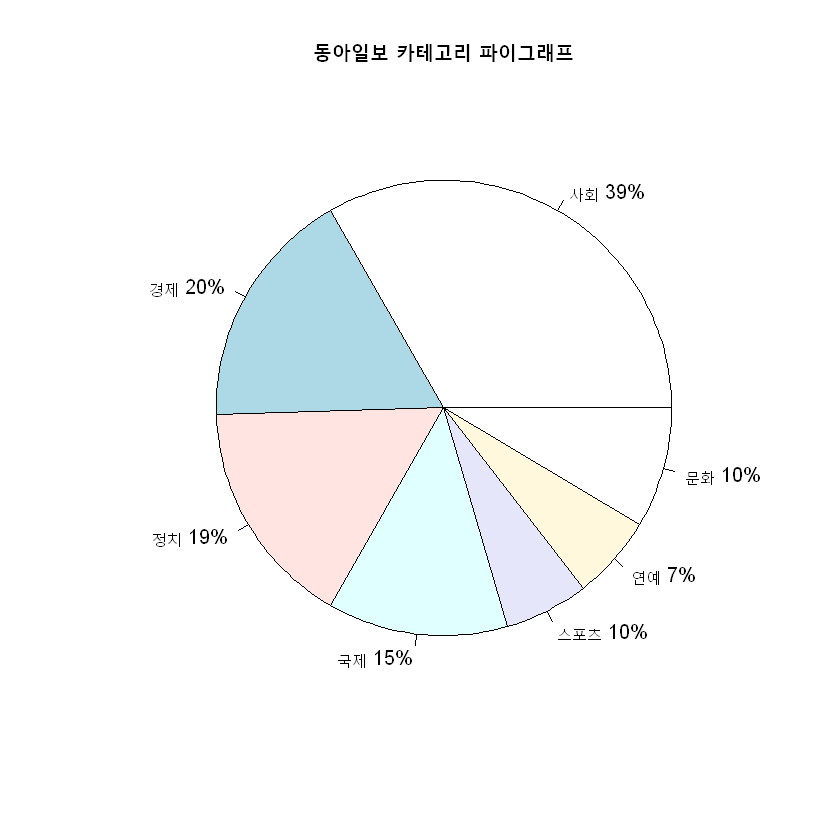

In [2]:
abc = c(39,20,19,15,7,7,10)
labels=c('사회 39%', '경제 20%', '정치 19%', '국제 15%', '스포츠 10%', '연예 7%', '문화 10%')



#mycolor=c(colors()[1],colors()[13],colors()[53],colors()[45],colors()[23],colors()[18])

title=c("동아일보 카테고리 파이그래프")



pie(abc,labels,main=title)

In [57]:
table(df2$topic)
# 경제 157, 20%
# 국제 116, 15%
# 문화 55,  7%
# 사회 303, 39%
# 스포츠 77,10%
# 연예 60,   7%

# 토픽 14개 적합


   e스포츠         IT    IT/의학       경제       국제       문화     부동산 
         1          1         31        157        116         55          1 
  브랜더쿠 사람속으로       사회     스포츠       야구       연예   오피니언 
         1         20        303         77          1         60         25 
      정치  주간 동아 
       145          4 

In [78]:
rank_lda <- LDA(df_rds, k = 14, control=list(seed=12345))
rank_lda

A LDA_VEM topic model with 14 topics.

In [100]:
rank_topics <- tidy(rank_lda,matrix='beta')
rank_topics$beta <- round(rank_topics$beta,4)
rank_topics[1:14,]

topic,term,beta
1,사고,0.0050
2,사고,0.0059
3,사고,0.0015
4,사고,0.0034
5,사고,0.0063
6,사고,0.0043
7,사고,0.0004
8,사고,0.0012
9,사고,0.0083
10,사고,0.0082


In [80]:
rank_terms<- rank_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  arrange(topic, -beta)

rank_terms

topic,term,beta
1,논란,0.0474
1,경기,0.0463
1,유족,0.0431
1,이태원,0.0400
1,경찰,0.0378
1,음주운전,0.0313
1,아들,0.0311
1,영상,0.0310
1,서비스,0.0276
1,집행유예,0.0271


$title
[1] "토픽 별 단어 랭킹"

attr(,"class")
[1] "labels"

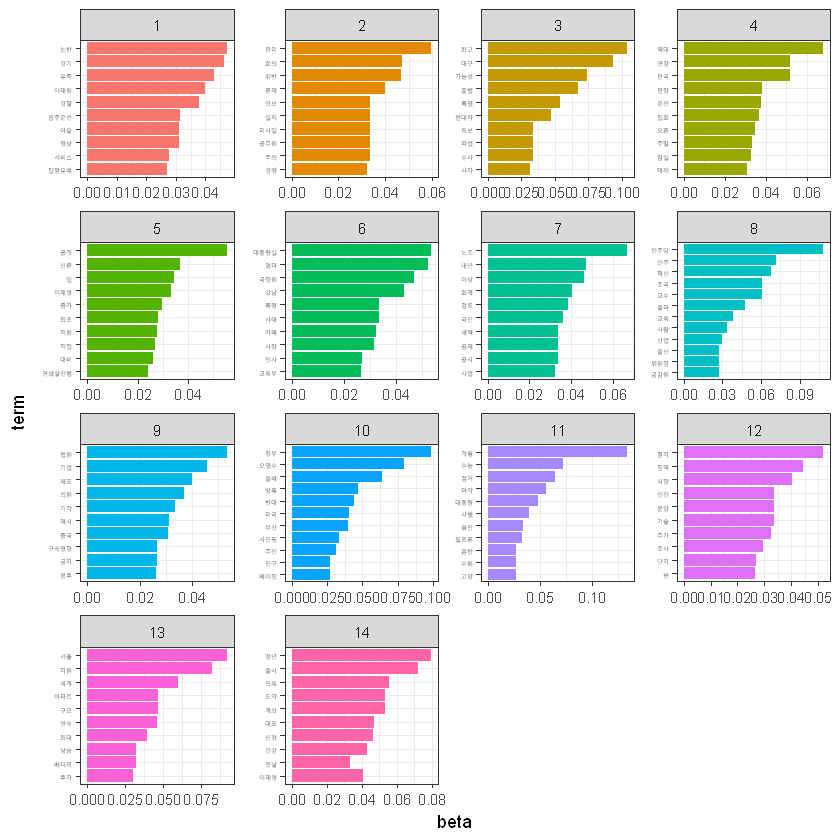

In [81]:
# mutate : 파생 col,row 만드는 함수
# reorder(x축변수, 기준변수) : 크기순으로 정렬
# factor : 범주형
# geom_col : 연속적 숫자 타입 y축 변수 지정 필수
# facet_wrap(~기준,,,) : 색깔 별로 나눠줌 
# facet_wrap( scales = ) : x축 y축 범위를 통일할지(fixed), 별개로 (free)
# coord_filp() : 그래프 90도 돌리기, xy 바꾸기
rank_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() + theme_bw() +
  theme(axis.text.y = element_text(size=5,face='bold'))
  ggtitle('토픽 별 단어 랭킹')

In [82]:
main_topic <- apply(posterior(rank_lda)$topics, 1, which.max)
table(main_topic)

main_topic
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 
67 55 51 54 68 63 55 51 64 49 59 57 56 58 

In [85]:
terms(rank_lda, 5) 

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14
논란,한미,최고,역대,공개,대통령실,노조,민주당,법원,정부,개월,환자,서울,청년
경기,회의,대구,연장,신문,엄마,내년,민주,기업,오염수,수능,징역,지원,출시
유족,위반,가능성,한국,입,국정원,이상,혁신,체포,올해,검거,시장,세계,의혹
이태원,문제,불법,현장,이재명,강남,회계,교수,의원,방류,마약,인천,아파트,도약
경찰,안보,폭염,운전,증가,폭행,검토,조국,기각,반대,대통령,기술,규모,계좌


In [86]:
m <- as.matrix(df_rds)[, 1:35]
m = t(m)

In [88]:
library(lsa)
m <- lw_bintf(m)*gw_idf(m)
round(m[, 1:30], 2)

,1,2,3,4,5,7,8,9,10,11,...,22,23,24,25,26,27,28,29,32,33
사고,7.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
병원,0.00,8.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
건설,0.00,0.00,7.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
노조,0.00,0.00,7.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
청년,0.00,0.00,0.00,7.07,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
도약,0.00,0.00,0.00,7.66,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
계좌,0.00,0.00,0.00,7.66,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
은행,0.00,0.00,0.00,8.33,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
대통령,0.00,0.00,0.00,0.00,7.49,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0
국정원,0.00,0.00,0.00,0.00,7.85,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0


In [90]:
LSA <- lsa(m, dims=2)
names(LSA)

Warning message in lsa(m, dims = 2):
"[lsa] - there are singular values which are zero."

[1] "tk" "dk" "sk"

In [91]:
Mk <- LSA$tk%*%diag(LSA$sk)%*%t(LSA$dk)
Mk

,1,2,3,4,5,7,8,9,10,11,...,903,904,905,906,907,908,909,911,912,913
사고,0.017121061398776740714034,0.00000000000000013221873919430483943155,0.17597322108038304655508,0.0032492309439170093121607,0.00000000000000033591220257500934926256,0.000000000000000023453723431580121858500,0.052506951061415708947866,0.24438820562449750650735,0.00000000000000014216513111317428454464,-0.00000000000000008180523299143623450723,...,0.15119238554389619055840,0.000000000000000018653108946619155338216,0,0,-0.000000000000000012627238846410930650033,0.00000000000000046783954035697100739578,0.000000000000000008496915180611927756460,0,0,0
병원,0.000000000000000081397781,0.00000000000000000000000000000062833980,0.00000000000000083660342,-0.0000000000000000387436880,0.00000000000000000000000000000157165537,0.000000000000000000000000000000076044838,0.000000000000000249396416,0.00000000000000116186404,0.00000000000000000000000000000067541600,-0.00000000000000000000000000000038891158,...,0.00000000000000071880335,0.000000000000000000000000000000088632183,0,0,-0.000000000000000000000000000000060032893,0.00000000000000000000000000000222296153,0.000000000000000000000000000000042260320,0,0,0
건설,0.065580899205584575195616,0.00000000000000050645734005255414579907,0.67405203097073285167795,0.0132150242809274710842349,0.00000000000000128704550717660124500158,0.000000000000000090340927474838293217280,0.201127138611341932383780,0.93611034599338105444133,0.00000000000000054455922424655131648327,-0.00000000000000031334876063876013023695,...,0.57913075914323186577093,0.000000000000000071449988790217913215731,0,0,-0.000000000000000048367662060715075934836,0.00000000000000179204105063354053833762,0.000000000000000032520322738597180743138,0,0,0
노조,0.121379115065782819393725,0.00000000000000093739447752626770295203,1.24755773793685897921080,0.0302505338593409348058039,0.00000000000000238481263450212593261318,0.000000000000000170995556181462462176299,0.372277283109175294306681,1.73258333681260934255874,0.00000000000000100793719516665384542536,-0.00000000000000057995653644991933648063,...,1.07187305686954159611446,0.000000000000000132247076435526662581237,0,0,-0.000000000000000089520349149771296830627,0.00000000000000331689895110691000961085,0.000000000000000059990394799196114722709,0,0,0
청년,-0.000691147583945507970778,0.00000000000000003431357085482617647575,-0.00451877072369434237831,8.2342468669683714921347928,0.00000000000000383909254264840817047477,0.000000000000005387201736654474167921569,0.033539991319619995302492,-0.00709544853313587992050,0.00000000000000006603773240609084068005,0.00000000000000000165716394001694325702,...,-0.00567300950196587307206,0.000000000000000006743206361114627728562,0,0,0.000000000000000000488587195476389029138,0.00000000000000017316761401053053112849,-0.000000000000000283558664300569554213641,0,0,0
도약,-0.000590689146107942620982,0.00000000000000003230192040180534233072,-0.00366796335548051719716,7.6553928000010840193567674,0.00000000000000357022373692931867293979,0.000000000000005008554895344029746391545,0.031341223206699013459353,-0.00585622741875482973051,0.00000000000000006182602166266495995195,0.00000000000000000129282365427156248914,...,-0.00481613727118209832695,0.000000000000000006325674596122674628491,0,0,0.000000000000000000415983437078064030188,0.00000000000000016241140412748616807595,-0.000000000000000263598872875983866910510,0,0,0
계좌,-0.000590689146107944138865,0.00000000000000003230192040180536082071,-0.00366796335548053280967,7.6553928000010893484272856,0.00000000000000357022373692932103953629,0.000000000000005008554895344032901419867,0.031341223206699034276035,-0.00585622741875485228191,0.00000000000000006182602166266499692758,0.00000000000000000129282365427156980783,...,-0.00481613727118211307210,0.000000000000000006325674596122677711095,0,0,0.000000000000000000415983437078065185774,0.00000000000000016241140412748624201854,-0.000000000000000263598872875984064170253,0,0,0
은행,0.004731659305436176389537,0.000000000000000043162513615

In [92]:
w2 <- diag(LSA$sk) %*% t(LSA$tk) #의미공간으로 투영
w2

사고,병원,건설,노조,청년,도약,계좌,은행,대통령,국정원,...,참석,홍준표,불법,경찰,민주,인사,수능,혼란,계속,출신
-0.0004795515,0.0000000000000001468368,-0.003953185,-0.0232537,-22.65826875,-21.06540394,-21.06540394,-3.7841721,-0.000000000000002356141,-0.000000000000002406440,...,0.0000000000000000004539147,-0.02391172,-0.01087204,-0.008907413,-0.000000000000001169387,-0.0000000000000006707547,-0.000000000000001223659,-0.0000000000000006699407,-0.00000000000000000126631,0.000000000000000000887952
-1.4585644441,-0.0000000000000069344117,-5.586917619,-10.3404328,0.06401343,0.05509435,0.05509435,-0.4022386,-0.000000000000020279697,-0.000000000000007475941,...,0.0000000000000011393247379,-9.75671244,-13.44521125,-14.978531027,-0.000000000000031585126,-0.0000000000000046046735,-0.000000000000032999271,-0.0000000000000307873071,-0.00000000000000292212374,0.000000000000000187956255


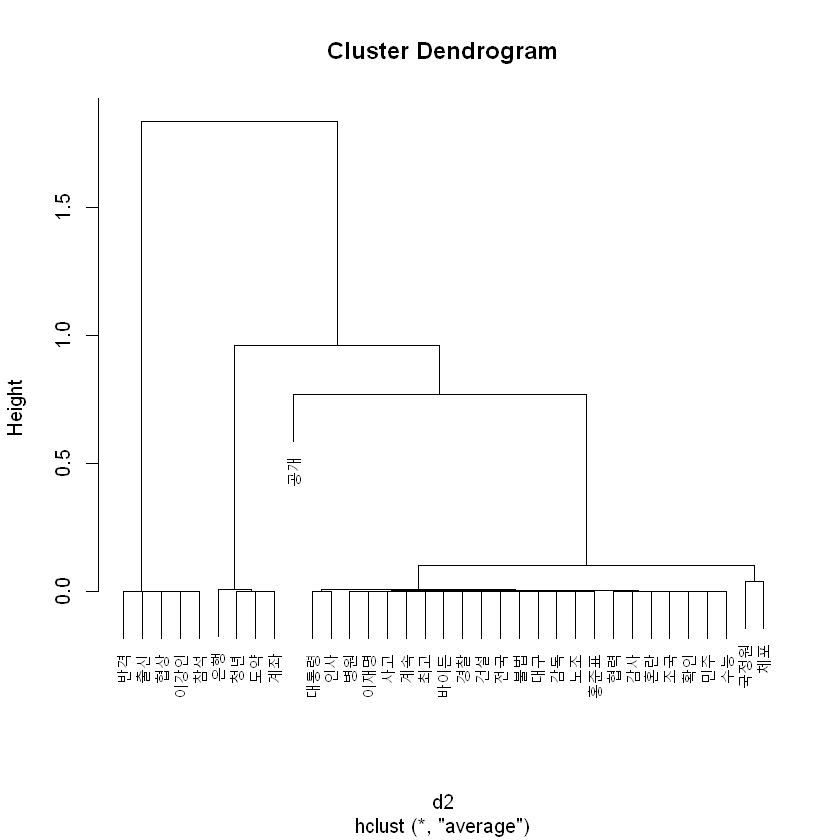

In [93]:
s2 <- lsa::cosine(w2); d2 <- as.dist(1-s2)
hc2 <- hclust(d2, "ave") # 계층적 군집분석
plot(hc2)


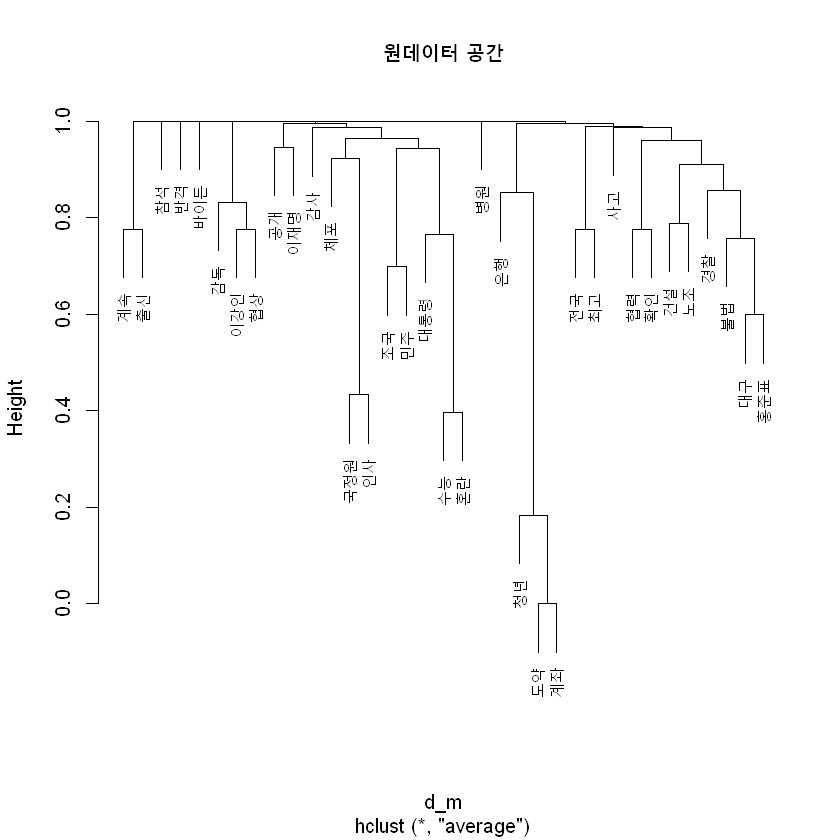

In [94]:
s_m <- lsa::cosine(t(m))
d_m <- as.dist(1-s_m)
hc_m <- hclust(d_m, "ave") # 계층적 군집분석
plot(hc_m, main="원데이터 공간")
# 높이는 서로 간의 거리

### 1. 실시간 뉴스의 카테고리의 개수는 사회, 경제, 정치 순으로 다른 카테고리보다 많은 비율을 차지 했다.
### 2. 최대 개수 단어는 공개, 징역, 정부, 민주당, 서울 순으로 사회, 정치 분야에 대한 단어 개수가 많았다.
### 3. 토픽 분석 + 계층적 군집분석
#### 3-1. 토픽 1 : 이태원 압사 참사에 대한 내용의 기사이며 카테고리는 사회에 가깝다.
#### 3-2. 토픽 2 : 한미 사이버안보 회의에 대한 기사이며, 정치
#### 3-3. 토픽 3 : 6/17 대구,경북 폭염주의보 발령에 대한 기사이며, 사회
#### 3-4. 토픽 4,6 : 단어 나열로 기사를 파악불가하다.
#### 3-5. 토픽 5 : 계충적 군집분석에서 유사도가 높은 '이재명','공개' 두 단어로 예상 가능하다.
#### 3-6. 토픽 7 : 노조 감사에 대한 기사이며, 정치,사회면 모두 적합하다. 계층적 군집분석에서  '노조','건설'의 유사도와 연결조합이 높기 때문에 건설 노조에 대한 기사일 확률이 높다.
#### 3-7. 토픽 8 : 민주당의 조국 출마에 대한 기사일 확률이 크다. 계층적 군집분석에서 '조국','민주'와의 유사도가 높고 정치면의 기사일 확률이 매우 높다.
#### 3-8. 토픽 9 : 법원의 체포동의안 또는 체포동의요구서 등등 법원의 결정에 대한 기사일 확률이 높다.
#### 3-9. 토픽 10 : 日오염수 방류에 대한 기사 일 것이며 정부의 의사표현이 담겨 있을 확률이 있다. 사회,정치면의 확률이 높다.
#### 3-10. 토픽 11 : 수능, 마약, 대통령 등 여러 토픽의 주제단어가 섞여 있어 판단하기 어렵다.
#### 3-11. 토픽 12 : 토픽11과 같이 단어의 개연성을 찾기 힘들다.
#### 3-12. 토픽 13 : 서울,아파트,규모,세계,지원 등등 경제 카테고리의 주제어가 많이 섞여있고 서울 아파트가 메인이 되는 경제 기사 일 확률이 매우 높다.
#### 3-13. 토픽 14 : 청년도약계좌에 대한 기사이며, 경제토픽의 확률이 매우 높다.


# 결론
## 동아일보의 최근 뉴스 동향으로 보았을 때 경제, 사회, 정치 기사가 문화,연예,스포츠 등등 기사 보다 훨씬 많은 비중을 차지 한다고 할 수 있다.
## 제목 최대 단어인 '공개' 는 기사에 대한 호기심을 불러 일으키는 단어 이므로 제목과 첫 문단에 가장 많이 들어갔다고 생각된다.
## 정치면에서는 여당인 '정부', 야당인 '민주당'의 개수가 최대이다. 제목과 첫 문단에 서로의 입장이나 반응에 대한 기사가 정치면의 대다수를 차지 한다고 보아도 된다.
## 토픽 모델링 또한 정치면과 사회면의 기사가 많았고, 스포츠, 문화, 연예에 대한 토픽은 아예 없다.
## 계층적 군집 분석에서 서로 같은 높이를 가지고 연결되어 있는 단어는 유사도가 높고 같은 토픽에 출현할 확률이 매우 높다. (대구,홍준표),(청년,도약,계좌),(조국,민주,대통령) 등등 같은 기사 안에서 추출되었다 볼 수 있다.
## 동아일보는 사회, 정치 카테고리를 보기에 적합하지만 문화, 연예, 스포츠 카테고리를 보기에 적합하지 않은 채널이며,  교차표에서 확인해보면 모든 형태어 3400여개가 있었지만 3개 이상 겹치는 형태어를 확인 해 보았을 때 300여개로 줄어 든다. 제목과 첫 문단에 자주 사용하던 어휘를 계속 반복 하는 것으로 보인다.